# Initialize

## Load libraries

In [8]:
import matplotlib
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
fig_width = 7
fig_height = 6 
fs = 18
ls = 16

# Data


## Generate data

In [10]:
# Linear model

a = 5
b = 2


# Number of points
n = 10

x = np.linspace(0,10,n)
y = np.zeros(n)
y_err = np.zeros(n)

i = 0

# Simulate experiment where we measure the value of y m times at each x. 
# Each measurement of y is subject to a normally distributed random error characterized by std. 
# We obtain the value for y and its uncertainty by calculating the mean and standard distribution of the m values.

# number of measurements per point
m = 5

for x_i in x:
    std = 2
    y_i = a+b*x_i
    
    yy = np.random.normal(y_i,std,m)
    
    mean_y = 1/m*np.sum(yy)
    var_y = 1/m*np.sum((yy-mean_y)**2)
    std_y = np.sqrt(var_y)
    
    y[i] = mean_y
    y_err[i] = std_y
     
    i = i+1
    


## Plot data

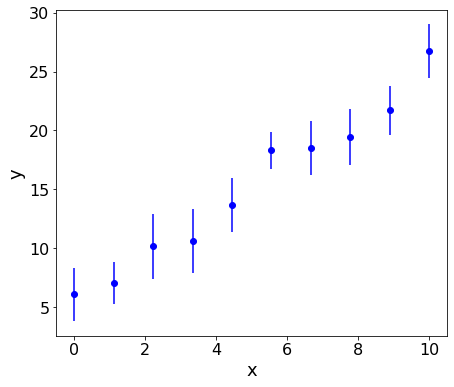

In [11]:
plt.figure(
    num=1,
    figsize=(fig_width, fig_height),
    facecolor='white')
plt.xlabel('x', fontsize=fs)
plt.ylabel('y', fontsize=fs)
plt.errorbar(x,y,yerr=y_err, fmt='bo')
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.show()

# Linear regression

In [12]:
# Calculate means of independent and dependent variable
mean_x = np.mean(x)
mean_y = np.mean(y)

print("mean x = {:0.2f}".format(mean_x),"   mean y = {:0.2f}".format(mean_y))
                                                                         
# Calculate the covanriance matrix between independent and dependent variable
cov = np.cov(x,y)

var_x = cov[0,0]*n/(n-1)
var_y = cov[1,1]*n/(n-1)
cov_xy = cov[0,1]*n/(n-2)


print("var(x) = {:0.2f}".format(var_x),"var(y) = {:0.2f}".format(var_y)," cov(x,y) = {:0.2f}".format(cov_xy))


# Calculate best fit parameters
beta = cov_xy/var_x
alpha = mean_y-beta*mean_x

# Calculate fit line
y_fit = alpha+x*beta

print("Fit parameter: beta = {:0.2f}".format(beta),"   alpha = {:0.2f}".format(alpha))

mean x = 5.00    mean y = 15.22
var(x) = 12.57 var(y) = 50.83  cov(x,y) = 28.00
Fit parameter: beta = 2.23    alpha = 4.08


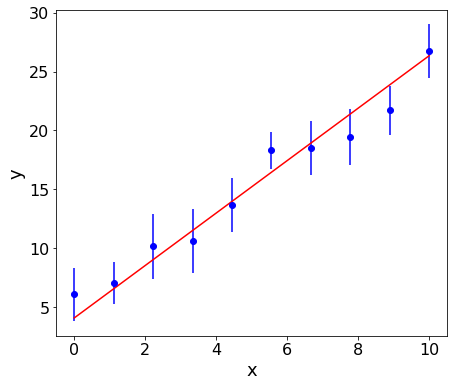

In [13]:
plt.figure(
    num=1,
    figsize=(fig_width, fig_height),
    facecolor='white')
plt.xlabel('x', fontsize=fs)
plt.ylabel('y', fontsize=fs)
plt.errorbar(x,y,yerr=y_err, fmt='bo')
plt.plot(x,y_fit,'r')
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.show()

## Residuals

In [14]:
# Calculate residuals
r = y-y_fit

# Calculate statistical moments of residuals
mean_r = np.mean(r)
cov = np.cov(x,r)
var_r = cov[1,1]*n/(n-2)
cov_xr = cov[0,1] # biased but this is not so relevant here

print("mean(r) = {:0.3f}".format(mean_r))
print("var(r) = {:0.3f}".format(var_r))
print("std(r) = {:0.3f}".format(np.sqrt(var_r)))
print("cov(x,r) = {:0.3f}".format(cov_xr))

mean(r) = 0.000
var(r) = 2.619
std(r) = 1.618
cov(x,r) = -2.800


### Plot residuals

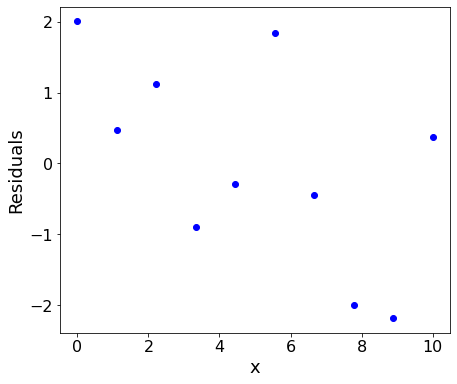

In [15]:
plt.figure(
    num=1,
    figsize=(fig_width, fig_height),
    facecolor='white')
plt.xlabel('x', fontsize=fs)
plt.ylabel('Residuals', fontsize=fs)
plt.plot(x,r,'bo')
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.show()

### Plot histogram of residuals

Number of samples n =  10
Number of bins =  3


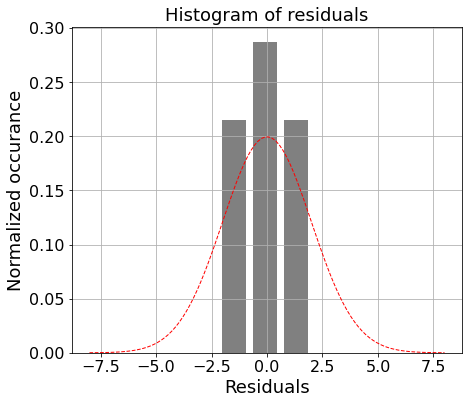

In [16]:
# Number of bins
nbins = np.int16(np.sqrt(n))

print("Number of samples n = ", n)
print("Number of bins = ", nbins)

plt.figure(
    figsize=(fig_width, fig_height),
    facecolor='white')

h, bins, patches = plt.hist(r,nbins, density=True, rwidth=0.8, facecolor='grey')

cbins=np.linspace(-4*std,4*std,100) 

pdf = 1/(std*np.sqrt(2*np.pi)) * np.exp(-cbins**2/(2*std**2))

plt.plot(cbins, pdf, 'r--', linewidth=1)

plt.xlabel('Residuals', fontsize=fs)
plt.ylabel('Normalized occurance', fontsize=fs)
plt.title('Histogram of residuals', fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.grid(True)

plt.show()

## Confidence intervals

In [17]:
# Calculate the confidence intervals for fit paramaters
var_b = var_r/(var_x)
var_a = var_b*np.sum(x**2)/n


print("var(alpha) = {:0.3f}".format(var_a), ", sigma_a = {:0.3f}".format(np.sqrt(var_a)))
print("var(beta) = {:0.3f}".format(var_b), ", sigma_b = {:0.3f}".format(np.sqrt(var_b)))

var(alpha) = 7.329 , sigma_a = 2.707
var(beta) = 0.208 , sigma_b = 0.456


## Plot confidence band

In [18]:
# Calculate condfidence interval
var_y_conf = var_b*(1/n*sum((x-mean_x)**2)+(x-mean_x)**2)

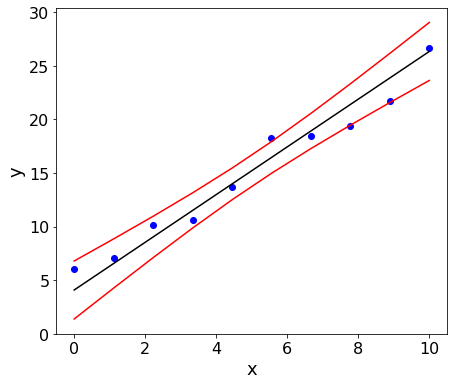

In [19]:
plt.figure(
    num=1,
    figsize=(fig_width, fig_height),
    facecolor='white')
plt.xlabel('x', fontsize=fs)
plt.ylabel('y', fontsize=fs)
plt.plot(x,y,'bo')
plt.plot(x,y_fit,'black')
plt.plot(x,y_fit-np.sqrt(var_y_conf),'red')
plt.plot(x,y_fit+np.sqrt(var_y_conf),'red')
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.show()